## **Dataset Resize**

In [1]:
from PIL import Image
import os, glob

# 가위 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# 바위 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
 
target_size=(28,28)

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# 보 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

target_size=(28,28)

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    

## **Dataset 불러오기**

In [2]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1741  
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

def load_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("시험데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

test_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_test(test_dir_path)
x_test_norm = x_test/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 1741 입니다.
시험데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (1741, 28, 28, 3)
y_train shape: (1741,)
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


## **모델 설계하기**

In [3]:
import tensorflow as tf
from tensorflow import keras

x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

n_channel_1=24
n_channel_2=24
n_dense=32
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 24)        5208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 600)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                19232     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## **훈련 및 시험하기**

In [4]:
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/30
55/55 [==============================] - 4s 65ms/step - loss: 1.0949 - accuracy: 0.3831
Epoch 2/30
55/55 [==============================] - 0s 1ms/step - loss: 1.0503 - accuracy: 0.4503
Epoch 3/30
55/55 [==============================] - 0s 1ms/step - loss: 0.9038 - accuracy: 0.5818
Epoch 4/30
55/55 [==============================] - 0s 1ms/step - loss: 0.7763 - accuracy: 0.6513
Epoch 5/30
55/55 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7438
Epoch 6/30
55/55 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.7932
Epoch 7/30
55/55 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8386
Epoch 8/30
55/55 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8576
Epoch 9/30
55/55 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.9041
Epoch 10/30
55/55 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.9219
Epoch 11/30
55/55 

## **모델 추론 확인 및 검출**

model.predict() 결과 :  [9.3465674e-01 6.5341033e-02 2.2783649e-06]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0
예측확률분포: [6.8749380e-01 3.1250626e-01 7.6314849e-10]
라벨: 1, 예측결과: 0


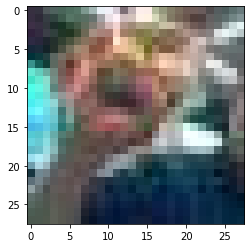

예측확률분포: [9.9977452e-01 2.9223735e-05 1.9624201e-04]
라벨: 2, 예측결과: 0


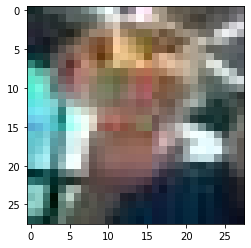

예측확률분포: [4.8924193e-01 5.1072711e-01 3.1002339e-05]
라벨: 0, 예측결과: 1


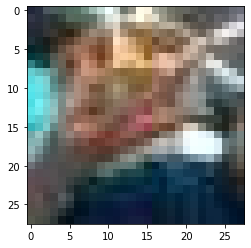

예측확률분포: [1.0716943e-03 9.9892753e-01 6.8601406e-07]
라벨: 0, 예측결과: 1


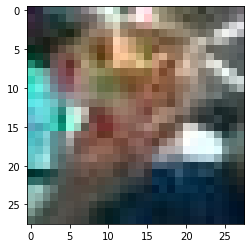

예측확률분포: [0.12497895 0.7965701  0.07845092]
라벨: 2, 예측결과: 1


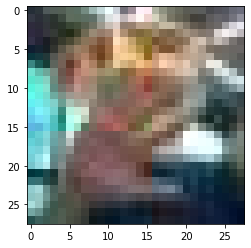

In [5]:
# 데이터 추론 확인
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0   
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

# 잘못 추론한 데이터 검출 및 확인
import random
import matplotlib.pyplot as plt
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()